# Ejercicio 14

Ajustar una curva de la forma $ae^{mx}$ (con $a > 0$) a los siguientes datos.

|     |       |        |        |        |        |        |
|-----|-------|--------|--------|--------|--------|--------|
| $x$ | $1.2$ | $2.8$  | $4.3$  | $5.4$  | $6.8$  | $7.9$  |
| $y$ | $2.1$ | $11.5$ | $28.1$ | $41.9$ | $72.3$ | $91.4$ |

Queremos ajustar una curva con coeficientes $a$ y $m$ tal que mejor aproxime los datos de la tabla.

$$
\begin{align*}
a e^{mx} &= y \\
\iff ln(a e^{mx}) &= ln(y) \\
\iff ln(a) + ln(e^{mx}) &= ln(y) \\
\iff ln(a) + mx*ln(e) &= ln(y) \\
\iff ln(a) + mx &= ln(y) \\
\iff \alpha + mx &= ln(y)
\end{align*}
$$

Si tomamos logaritmo natural a los valores de $y$ podemos transformar la curva exponencial en una recta, y podemos usar cuadrados mínimos lineales para encontrar los coeficientes. Notar que $a > 0$ luego podemos tomarle logaritmo $\alpha = ln(a)$.

Sea $A \in \mathbb{R}^{6x2}$ la matriz asociada a la recta de cuadrados mínimos de la tabla, y sea $b \in \mathbb{R}^{6x1}$ los logaritmos de los valores de $y$.

$$
A
= \begin{bmatrix}
1 & 1.2 \\
1 & 2.8 \\
1 & 4.3 \\
1 & 5.4 \\
1 & 6.8 \\
1 & 7.9
\end{bmatrix}
\hspace{2em}
b = \begin{bmatrix}
ln(2.1) \\
ln(11.5) \\
ln(28.1) \\
ln(41.9) \\
ln(72.3) \\
ln(91.4)
\end{bmatrix}
$$

Buscamos $(\alpha,m)$ tal que $A^tA(\alpha,m) = A^tb$. Por ecuaciones normales, $(\alpha,m)$ es una solución al problema de cuadrados mínimos: $\text{min}_{x \in \mathbb{R}^2} ||Ax - b||_2^2$.

Luego $(\alpha,m)$ son los coeficientes de la recta que mejor aproxima los datos de la tabla. Para definir la curva exponencial planteada originalmente, obtenemos $a = e^\alpha$.

In [9]:
import numpy as np

x = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
y = np.array([2.1, 11.5, 28.1, 41.9, 72.3, 91.4])
b = np.log(y)

A = np.column_stack([np.ones(len(x)), x])
alpha, m = np.linalg.solve(A.T @ A, A.T @ b)
a = np.exp(alpha)
print(f"a = {a}\nm = {m}")

a = 1.8507955154914053
m = 0.5407646500271139


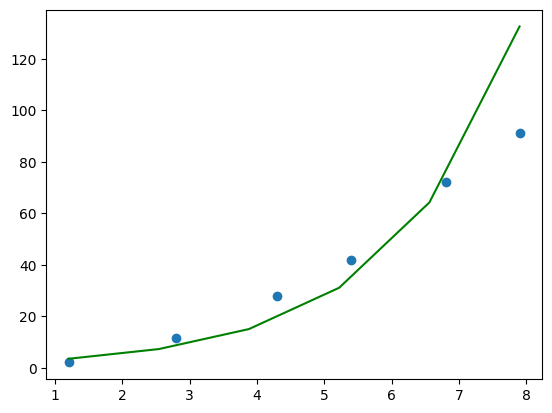

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x=x, y=y)

f = lambda x: a * np.exp(m * x)
fx = np.linspace(x.min(), x.max(), len(x))
fy = list(map(f, fx))
plt.plot(fx, fy, c="green");